In [2]:
from pandas import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#plt.style.use('ggplot')
#plt.style.use('ggplot')
%matplotlib inline

## Read Dataset 2: London Kensington  

Sulphur dioxide = Rikkidioksidi  
Nitric oxide = Typpioksidi  
Nitrogen dioxide = Typpidioksidi  
Ozone = Otsoni

In [4]:
df = read_csv('../data/AirQualityDataHourly.csv', header=4)
df['Date'] =  pd.to_datetime(df['Date'], format='%d-%m-%Y')
idf = df.set_index(['Date','time'])

df2 = read_csv('../data/AirQualityData15Minutes.csv', header=4)
df2['Date'] =  pd.to_datetime(df2['Date'], format='%d-%m-%Y')
idf2 = df2.set_index(['Date','time'])

## Prepare data

Change data type to numeric

In [11]:
idf = idf.convert_objects(convert_numeric=True)
#pd.to_numeric(idf).dtypes
idf.head()

/home/vagrant/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


PM10 particulate matter (Hourly measured)  \
Date       time                                               
2015-12-01 01:00                                        4.0   
           02:00                                        4.2   
           03:00                                        2.5   
           04:00                                        3.3   
           05:00                                        7.0   

                          status/unit  Modelled Wind Direction status/unit.1  \
Date       time                                                                
2015-12-01 01:00  V ugm-3 (TEOM FDMS)                      NaN           NaN   
           02:00  V ugm-3 (TEOM FDMS)                      NaN           NaN   
           03:00  V ugm-3 (TEOM FDMS)                      NaN           NaN   
           04:00  V ugm-3 (TEOM FDMS)                      NaN           NaN   
           05:00  V ugm-3 (TEOM FDMS)                      NaN           NaN   

                  Modelled Wind Speed status/unit.2  Modelled Temperature  \
Date       time                                                             
2015-12-01 01:00                  NaN           NaN                   NaN   
           02:00                  NaN           NaN                   NaN   
           03:00                  NaN           NaN                   NaN   
           04:00                  NaN           NaN                   NaN   
           05:00                  NaN           NaN                   NaN   

                 status/unit.3  Nitric oxide status/unit.4  Nitrogen dioxide  \
Date       time                                                                
2015-12-01 01:00           NaN       1.48512       V ugm-3          27.98243   
           02:00           NaN       0.81449       V ugm-3          23.78066   
           03:00           NaN       0.35922       V ugm-3          18.38964   
           04:00           NaN       0.71845       V ugm-3          26.41210   
           05:00           NaN       6.42983       V ugm-3          46.34561   

                 status/unit.5     Ozone status/unit.6  \
Date       time                                          
2015-12-01 01:00       V ugm-3  33.86038       V ugm-3   
           02:00       V ugm-3  35.39041       V ugm-3   
           03:00       V ugm-3  43.10712       V ugm-3   
           04:00       V ugm-3  31.28260       V ugm-3   
           05:00       V ugm-3  13.02194       V ugm-3   

                  PM2.5 particulate matter (Hourly measured)  \
Date       time                                                
2015-12-01 01:00                                         6.1   
           02:00                                         1.2   
           03:00                                         2.8   
           04:00                                         3.0   
           05:00                                         4.7   

                        status/unit.7  Sulphur dioxide status/unit.8  
Date       time                                                       
2015-12-01 01:00  V ugm-3 (TEOM FDMS)          1.13266       V ugm-3  
           02:00  V ugm-3 (TEOM FDMS)          0.26077       V ugm-3  
           03:00  V ugm-3 (TEOM FDMS)          0.39115       V ugm-3  
           04:00  V ugm-3 (TEOM FDMS)          0.91535       V ugm-3  
           05:00  V ugm-3 (TEOM FDMS)          1.04507       V ugm-3

Slice data to training and testing set

In [4]:
train = idf.loc['2015-12-01':'2016-02-29']
test = idf.loc['2016-03-01':'2016-03-31']

## Descriptive statistics

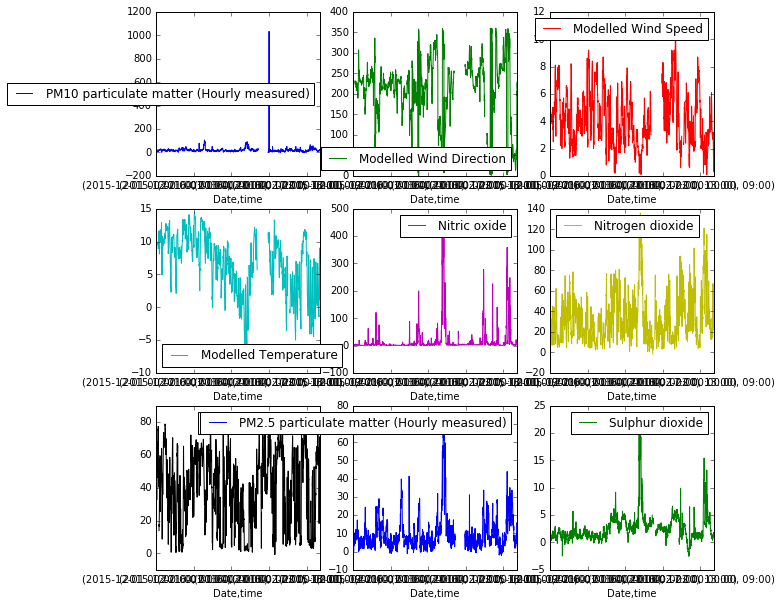

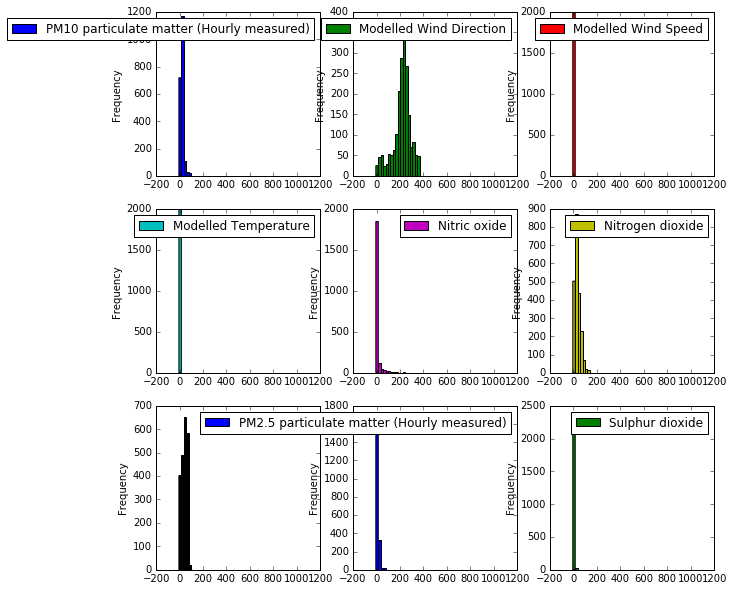

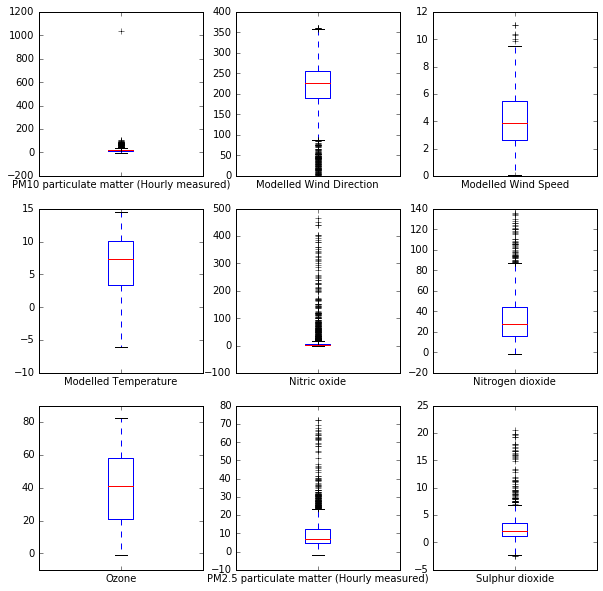

In [5]:
train.plot(subplots=True, layout=(3, 3), figsize=(10, 10), sharex=False);
plt.show()
train.plot.hist(subplots=True, layout=(3, 3), figsize=(10, 10), sharex=False, bins=50);
plt.show()
train.plot.box(subplots=True, layout=(3, 3), figsize=(10, 10), sharex=False);
plt.show()

It seems that PM10 data has some outliers, so lets clean those out

In [6]:
train['PM10 particulate matter (Hourly measured)'].max()

1032.9000000000001

In [7]:
# Remove the row that has max PM10 value
train = train[train['PM10 particulate matter (Hourly measured)'] != 1032.9]

In [8]:
train['PM10 particulate matter (Hourly measured)'].max()

106.0

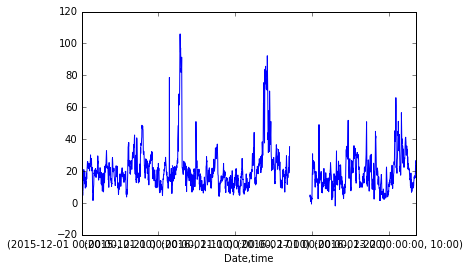

In [9]:
#train.plot(subplots=True, layout=(3, 3), figsize=(10, 10), sharex=False);
train['PM10 particulate matter (Hourly measured)'].plot()

## Testing

In [ ]:
AirQuality15min = read_csv('../data/AirQualityData15Minutes.csv', header=4)
AirQuality1hour = read_csv('../data/AirQualityDataHourly.csv', header=4)
AirQuality1hour.head(1)

In [ ]:
AirQuality1hour.dtypes

In [ ]:
#idf = AirQuality1hour.set_index(['Date','time']).dropna(how='any')
#idf = AirQuality1hour.set_index(['Date']).dropna(how='any')
idf = AirQuality1hour.set_index(['Date','time'])
#idf.index = pd.to_datetime(AirQuality1hour['Date'])
#idf.iloc['01-12-2015':'24-12-2015']
#s.loc[(slice('a', 'b'), slice(2, 10))]
idf.loc[slice('01-12-2015','03-12-2015'), slice('01:00','03:00')]

In [ ]:
test = idf

In [ ]:

#idf = idf.unstack()
#idf.sort_index(inplace=True)
#idf = idf.unstack()
#idf
print idf['02-12-2015':'01-03-2016']

In [ ]:
# Dec 2015 - Feb 2016
#train_idx = 
#AirQuality1hour[2:3]
#AirQuality1hour.loc['01-03-2016':'31-03-2016']
#AirQuality1hour.loc['01122015':'31122015']
#idf.unstack()
#idf.unstack().index.loc['01-03-2016':'31-03-2016']
idf.unstack()['01122015':'03032016'].unstack().unstack().unstack().unstack().unstack()
# Mar 2016
#test_idx = 

In [ ]:
#pm10 = idf[['PM10 particulate matter (Hourly measured)']] #0
#no = idf[['Nitric oxide']] #8
#no2 = idf[['Nitrogen dioxide']] #10
#oz = idf[['Ozone']] #12
#pm25 = idf[['PM2.5 particulate matter (Hourly measured)']] #14
#so2 = idf[['Sulphur dioxide']] #16

data = idf.drop(idf.columns[[1,2,3,4,5,6,7,9,11,13,15,17]], axis=1)
data = data.convert_objects(convert_numeric=True)
#data.index = pd.to_datetime(data.index)
#pd.to_numeric(data)
data.dtypes

In [ ]:
data.unstack().unstack().unstack().unstack().unstack().unstack()

In [ ]:
#no2.describe()
#data[data.columns[[5]]].astype(float).plot(figsize=(15,5))
data[data.columns[[0]]].plot(figsize=(15,5))
#np.where(no.applymap(lambda x: x == ''))
#np.where(no.isnull())

In [ ]:
# Draw graphs
data.plot(subplots=True, layout=(3, 3), figsize=(10, 10), sharex=False);
plt.show()
data.plot.hist(subplots=True, layout=(3, 3), figsize=(10, 10), sharex=False, bins=50);
plt.show()
data.plot.box(subplots=True, layout=(3, 3), figsize=(10, 10), sharex=False);
plt.show()

In [ ]:
# Find null values
np.where(pm10.isnull())

In [ ]:
# Find empty strings
np.where(pm10.applymap(lambda x: x == ''))

In [ ]:
idf[['PM10 particulate matter (Hourly measured)','Ozone']].head()

In [ ]:
idf[['PM10 particulate matter (Hourly measured)']].describe()

In [ ]:
#fig = idf[['PM10 particulate matter (Hourly measured)']]
pm10.plot(figsize=(15,5))

In [ ]:
fig = idf[['PM10 particulate matter (Hourly measured)']]
fig.hist(bins=50)

In [ ]:
#idf.boxplot(column='PM10 particulate matter (Hourly measured)')
fig = idf[['PM10 particulate matter (Hourly measured)']]
#fig.boxplot(label='PM10', figsize=(15,5))
fig.boxplot(figsize=(5,20))

In [ ]:
import numpy as np 
import pylab 
import scipy.stats as stats

measurements = np.random.normal(loc = 20, scale = 5, size=100)
#type(measurements)
fig2 = idf[['PM10 particulate matter (Hourly measured)']].values
#type(fig2)
#fig2
stats.probplot(fig2, dist="norm", plot=pylab)
pylab.show()

In [ ]:
idf['PM10 particulate matter (Hourly measured)'].idxmax()
idf['PM10 particulate matter (Hourly measured)'].max()

In [ ]:
# Row that has max PM10 value
idf.loc[idf['PM10 particulate matter (Hourly measured)'] == idf['PM10 particulate matter (Hourly measured)'].max()]

In [ ]:
# Remove the row that has max PM10 value
idf = idf[idf['PM10 particulate matter (Hourly measured)'] != 1032.9]
idf.head()

In [ ]:
# Row that has max PM10 value
idf.loc[idf['PM10 particulate matter (Hourly measured)'] == idf['PM10 particulate matter (Hourly measured)'].max()]